This analyzses 2022 data for RIBs

In [5]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load the CSV file into a Pandas DataFrame
#df = pd.read_csv('2023clean.csv')
df_head = pd.read_csv('2022HEAD.csv')
df_tail = pd.read_csv('2022TAIL.csv')

# Convert Unix epoch column to datetime objects
df_head['Timestamp'] = pd.to_datetime(df_head['epoch'], unit='s')
df_tail['Timestamp'] = pd.to_datetime(df_tail['epoch'], unit='s')


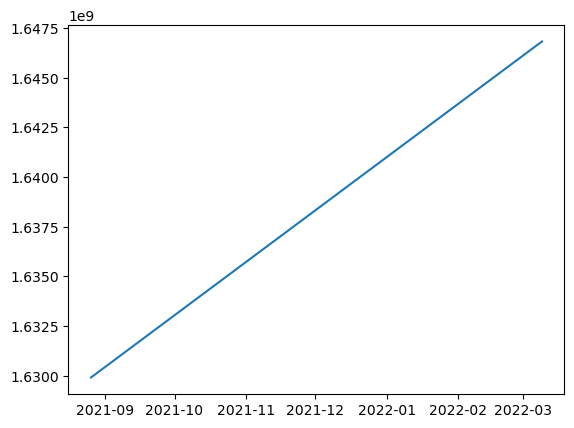

In [9]:
df = pd.concat([df_head, df_tail], ignore_index=True, sort=False)
df.columns = [col.strip() for col in df.columns]
#df_merged = df_head.append(df_tail, ignore_index=True)
plt.plot(df['Timestamp'] , df['epoch'])

In [10]:
#Load county customer maximums from csv file
df_count = pd.read_csv("county_cust.csv", header=None, index_col=0)

counties = list(df.columns.values)
counties = [c.strip() for c in counties[3:-1]]


#for foo in counties:
#    print("--{}--".format(foo))
#    print(df_count.loc[foo])

#print(df.iloc[0])
#print(df['Butte'])
print(df['Timestamp'][0])

2021-08-25 18:55:02.852110592


Alameda
1    240190
Name: Alameda, dtype: int64


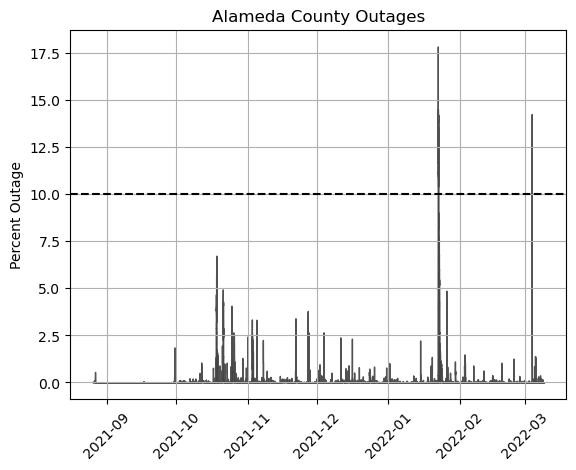

In [11]:

## Plot a single county
plt.figure()  # Create a new figure
# Plot columns 2 through 10 on the same axis
#plt.figure(figsize=(10, 6))  # Set the figure size


#mpl.rcParams.update(mpl.rcParamsDefault)
#inline_rc = dict(mpl.rcParams)
#mpl.rcParams.update(inline_rc)
#plt.style.use('grayscale')

cnty = counties[0]
print(cnty)
print(df_count.loc[cnty])
#plt.plot(df['Timestamp'], df[cnty]/df_count.loc[cnty], label=cnty)  # Plot the column data and set the label as the column name

#plt.plot(df['Timestamp'], 100.*df[cnty]/float(df_count.loc[cnty]), color='#808080')  # Plot the column data and set the label as the column name

plt.fill_between(
        x=df['Timestamp'], 
        y1= 100.*df[cnty]/float(df_count.loc[cnty]), 
        color= "#404040",
        alpha= 0.9)

plt.axhline(y=10.0, color='#000000', linestyle='--')



plt.title(f'{cnty} County Outages')  # Set the title
#plt.xlabel('Index')  # Set the x-axis label
plt.ylabel('Percent Outage')  # Set the y-axis label
plt.xticks(rotation=45)
plt.grid(True)  # Enable grid lines
#plt.legend()  # Show the legend with column names
plt.show()  # Show the plot
#plt.savefig(f'{cnty}-thresh.png', bbox_inches='tight', dpi=600)

Alameda
Alpine
Amador
Butte
Calaveras
Colusa
Contra Costa
Del Norte
El Dorado
Fresno
Glenn
Humboldt
Kern
Kings
Lake
Lassen
Los Angeles
Madera
Marin
Mariposa
Mendocino
Merced
Monterey
Napa
Nevada
Placer
Plumas
Sacramento
San Benito
San Francisco
San Joaquin
San Luis Obispo
San Mateo
Santa Barbara
Santa Clara
Santa Cruz
Shasta
Sierra
Siskiyou
Solano
Sonoma
Stanislaus
Sutter
Tehama
Trinity
Tulare
Tuolumne
Unknown
Ventura
Yolo
Yuba


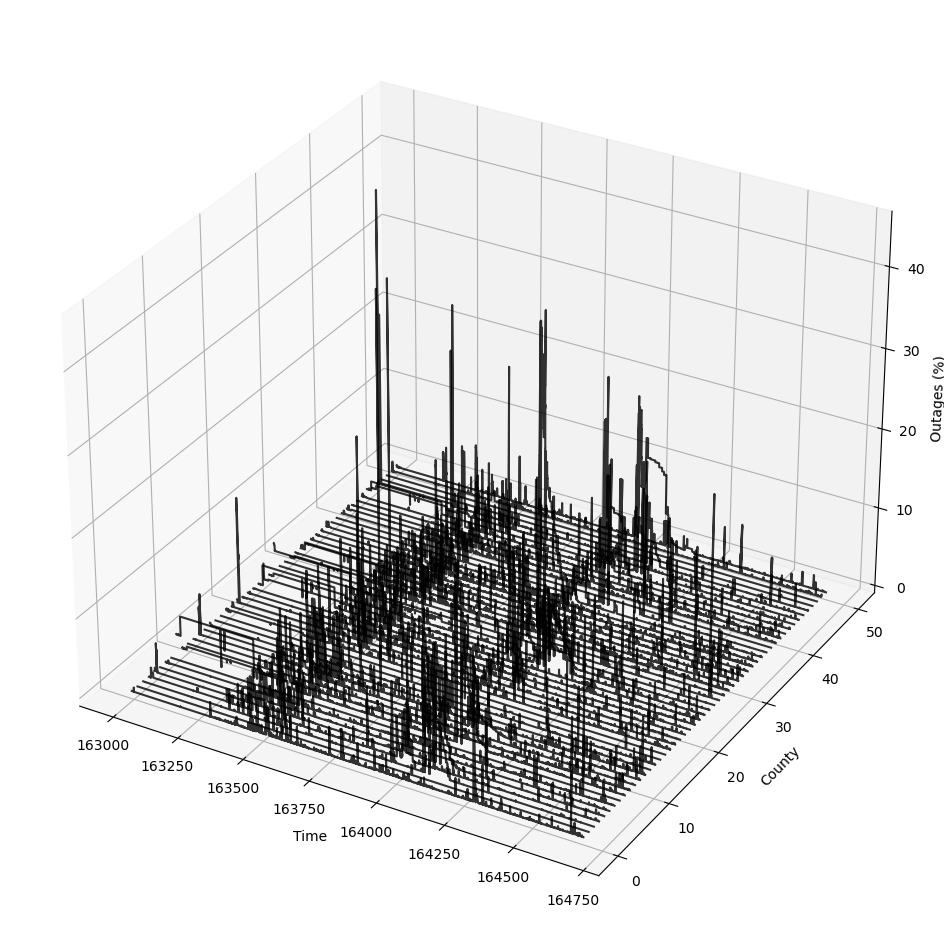

In [47]:
%matplotlib inline
## Plot all columns on the same axis


fig = plt.figure(figsize=(20, 12))  # Set the figure size

ax = fig.add_subplot(projection='3d')

#plt.style.use('grayscale')

for i, cnty in enumerate(counties):
    print(cnty)
    #print(df_count.loc[cnty])
    #plt.plot(df['epoch'][1:10000]/10000, 100*df[cnty][1:10000]/df_count.loc[cnty], label=cnty)  # Plot the column data and set the label as the column name

    #ax.bar(df['epoch'][1:10000], 100.*df[cnty][1:1000]/float(df_count.loc[cnty]), zs=i, zdir='y', alpha=0.9, color='b')  # Plot the column data and set the label as the column name
    #ax.bar(df['epoch'][1:10000]/10000, 100*df[cnty][1:10000]/float(df_count.loc[cnty]), zs=i, zdir='y', alpha=0.5, color='k')  # Plot the column data and set the label as the column name
    ax.plot(df['epoch']/10000, 100*df[cnty]/float(df_count.loc[cnty]), zs=i, zdir='y', alpha=0.8, color='k')  # Plot the column data and set the label as the column name


#plt.axhline(y=10.0, color='#000000', linestyle='--')



#plt.title(f'{cnty} County Outages')  # Set the title
#plt.xlabel('Index')  # Set the x-axis label
#plt.ylabel('Percent Outage')  # Set the y-axis label
#plt.xticks(rotation=45)
#plt.grid(True)  # Enable grid lines
#plt.legend()  # Show the legend with column names
ax.set_xlabel('Time')
ax.set_ylabel('County')
ax.set_zlabel('Outages (%)')

#ax.set_yticks(counties[0:10])

plt.savefig('threedee-thresh.png', bbox_inches='tight', dpi=100)
plt.show()  # Show the plot


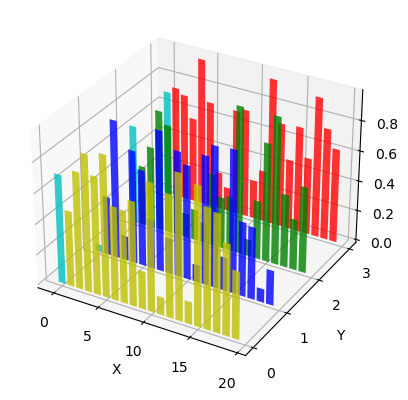

In [22]:
np.random.seed(19680801)


fig = plt.figure()
ax = fig.add_subplot(projection='3d')

colors = ['r', 'g', 'b', 'y']
yticks = [3, 2, 1, 0]
for c, k in zip(colors, yticks):
    # Generate the random data for the y=k 'layer'.
    xs = np.arange(20)
    ys = np.random.rand(20)

    # You can provide either a single color or an array with the same length as
    # xs and ys. To demonstrate this, we color the first bar of each set cyan.
    cs = [c] * len(xs)
    cs[0] = 'c'

    # Plot the bar graph given by xs and ys on the plane y=k with 80% opacity.
    ax.bar(xs, ys, zs=k, zdir='y', color=cs, alpha=0.8)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# On the y-axis let's only label the discrete values that we have data for.
ax.set_yticks(yticks)

plt.show()

In [9]:

counties = list(df.keys()[3:-1])
county_data =  df.columns[3:-1]
print(county_data)

Index([' Alameda', ' Alpine', ' Amador', ' Butte', ' Calaveras', ' Colusa',
       ' Contra Costa', ' Del Norte', ' El Dorado', ' Fresno', ' Glenn',
       ' Humboldt', ' Kern', ' Kings', ' Lake', ' Lassen', ' Los Angeles',
       ' Madera', ' Marin', ' Mariposa', ' Mendocino', ' Merced', ' Monterey',
       ' Napa', ' Nevada', ' Placer', ' Plumas', ' Sacramento', ' San Benito',
       ' San Francisco', ' San Joaquin', ' San Luis Obispo', ' San Mateo',
       ' Santa Barbara', ' Santa Clara', ' Santa Cruz', ' Shasta', ' Sierra',
       ' Siskiyou', ' Solano', ' Sonoma', ' Stanislaus', ' Sutter', ' Tehama',
       ' Trinity', ' Tulare', ' Tuolumne', ' Unknown', ' Ventura', ' Yolo',
       ' Yuba'],
      dtype='object')


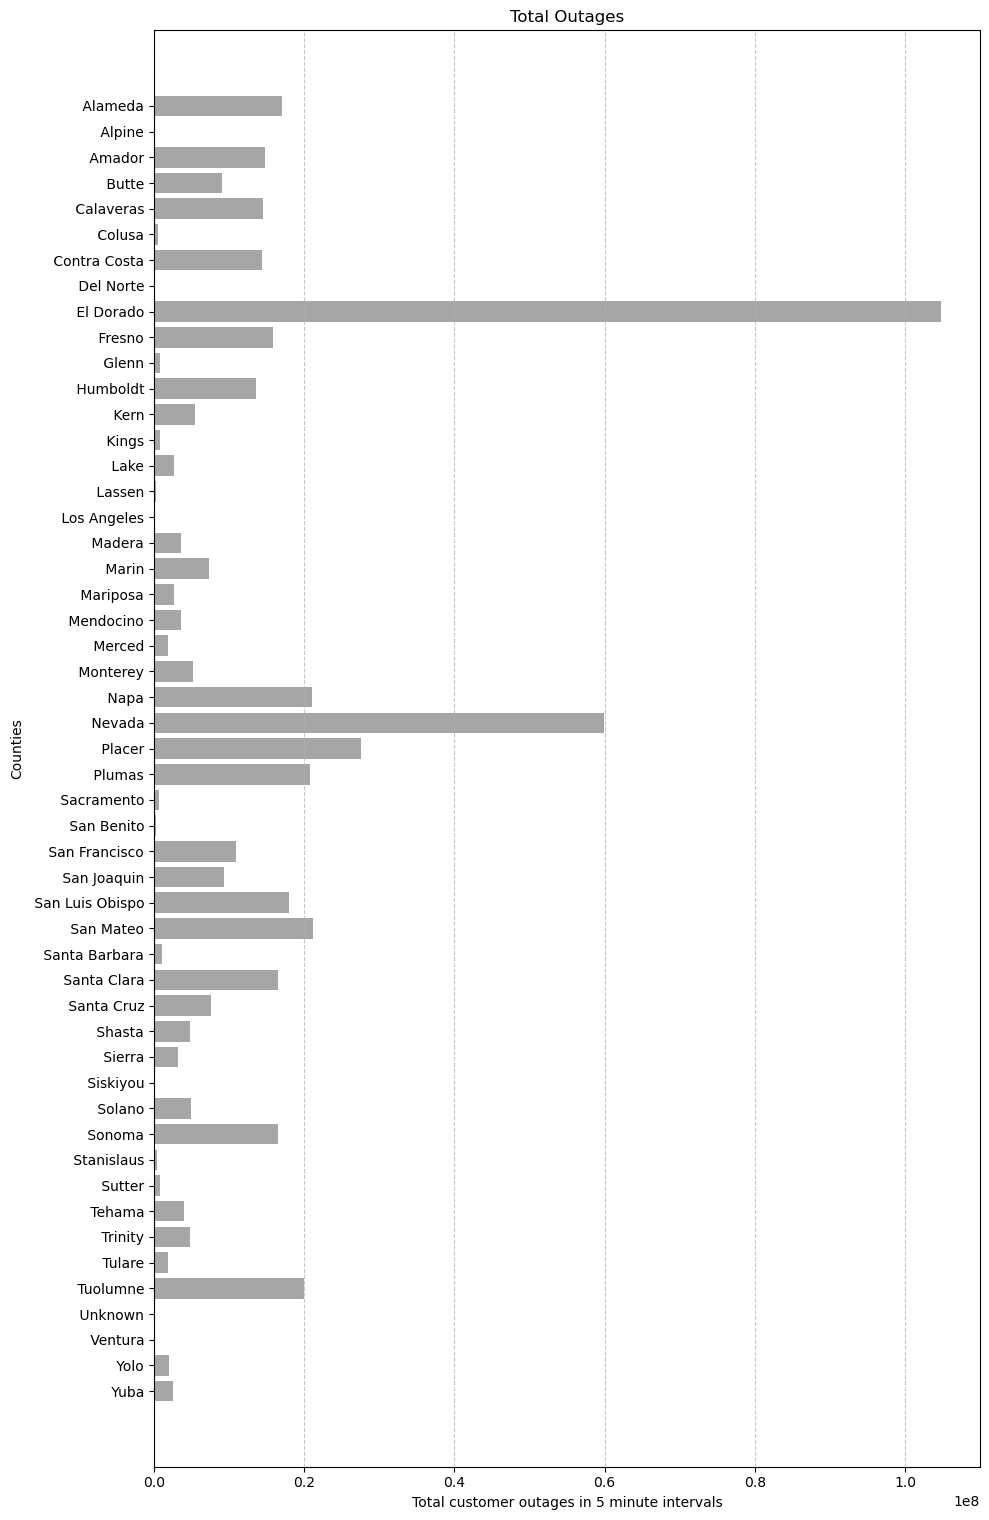

In [16]:
# plot county marginals (summed over time)



columns_to_plot = df.columns[3:-1]

# Calculate the sum of each selected column
column_sums = df[columns_to_plot].sum()

# Convert the column names and sums into lists
column_names = column_sums.index.tolist()
column_sums_values = column_sums.tolist()

plt.figure(figsize=(10, len(column_names) * 0.3))

# Plotting the horizontal bar chart
plt.barh(column_names, column_sums_values, alpha=0.7, color='gray')
plt.gca().invert_yaxis()

plt.xlabel('Total customer outages in 5 minute intervals')
plt.ylabel('Counties')
plt.title('Total Outages')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('county-bar-marginal', bbox_inches='tight', dpi=600)
plt.show()



In [47]:
foo = np.array(df.iloc[4:6,3:-1].sum(axis=1))
print(foo)

[7422 7422]


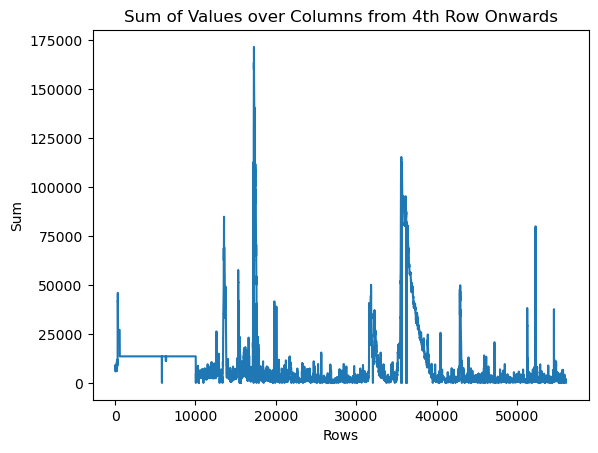

In [51]:
#Plot time marginals 

summed_df = df.iloc[:,3:-1].sum(axis=1)



# Create a line plot
plt.plot(summed_df.index, summed_df.values)

plt.xlabel('Rows')
plt.ylabel('Sum')
plt.title('Sum of Values over Columns from 4th Row Onwards')
plt.show()

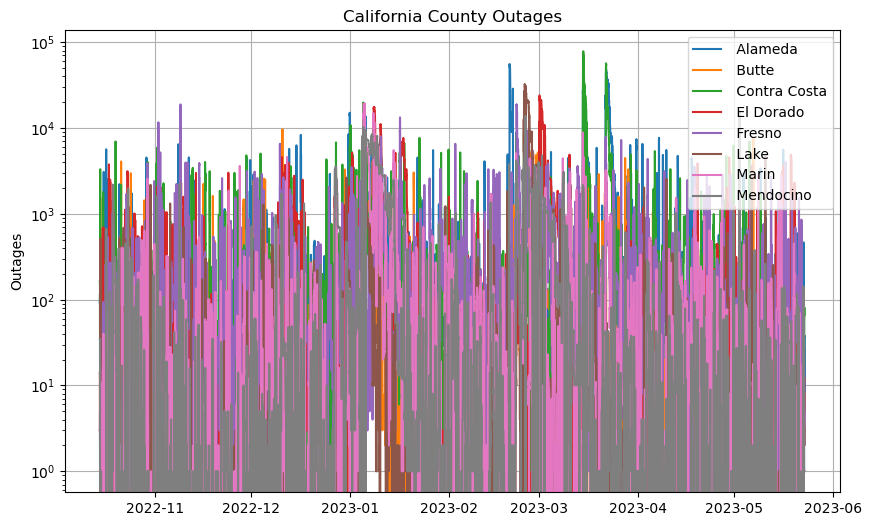

In [3]:


# Create a new figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot columns 2 through 10 on the same axis
for column in df.columns[3:11]:
    ax.plot(df['Timestamp'], df[column], label=column)  # Plot the column data and set the label as the column name

ax.set_title('California County Outages')  # Set the title
ax.set_ylabel('Outages')  # Set the y-axis label
#ax.set_xticklabels(df['Timestamp'], rotation=45)
ax.grid(True)  # Enable grid lines
ax.legend()  # Show the legend with column names

ax.set_yscale('log')  # Set the y-axis scale to logarithmic

plt.savefig('county-bar-log.png', bbox_inches='tight', dpi=600)
plt.show()  # Show the plot

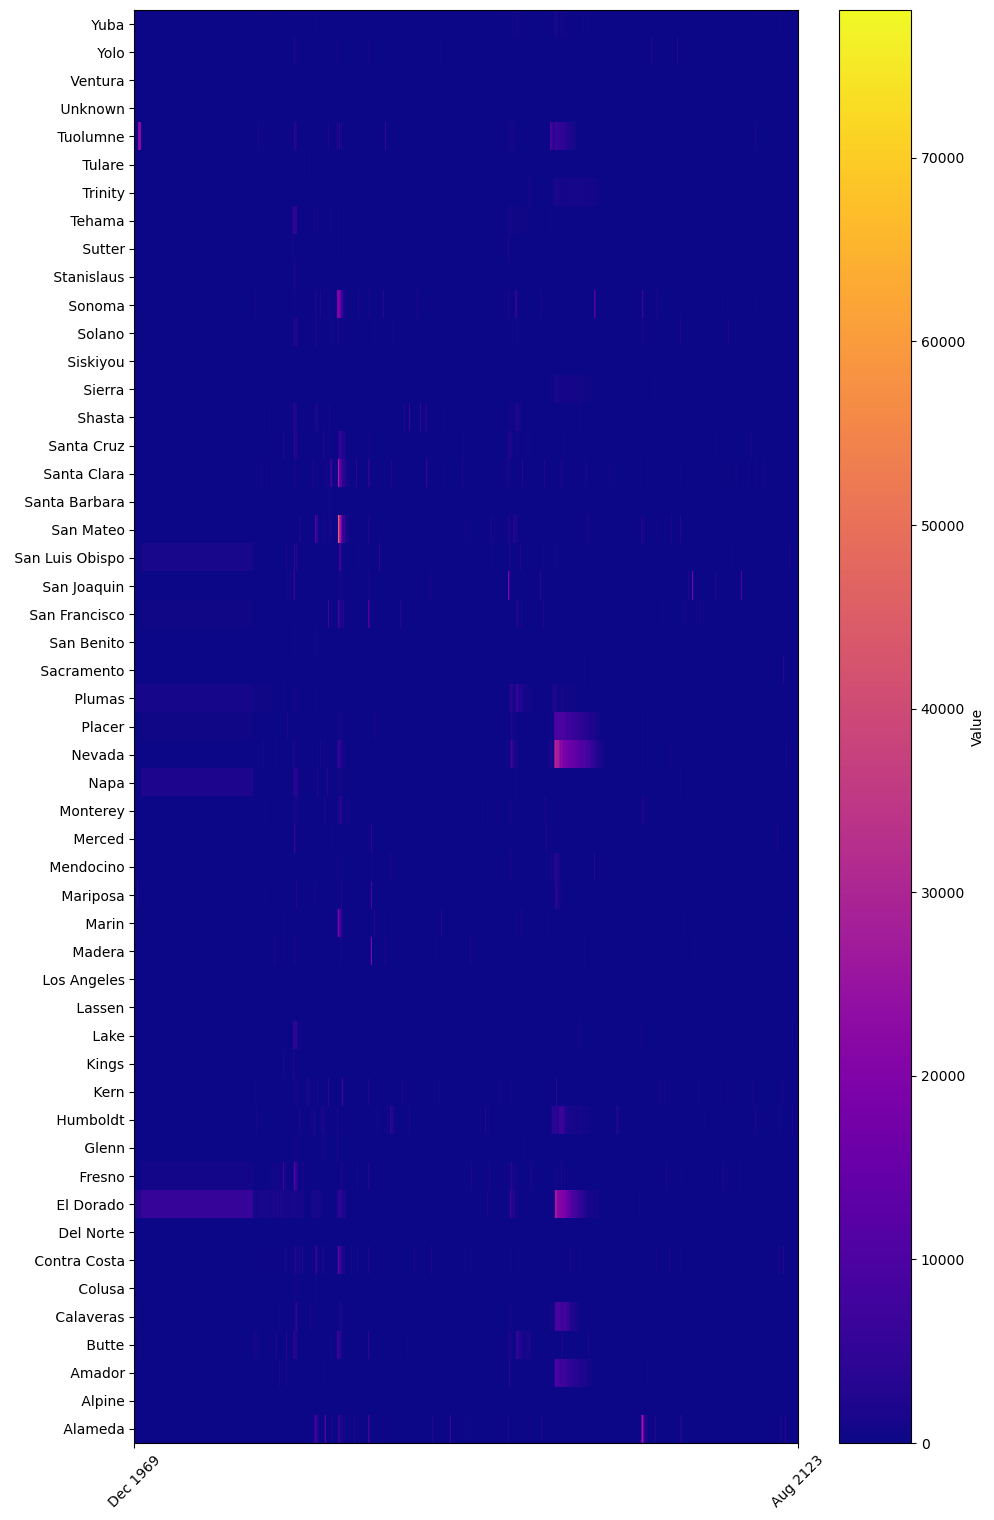

In [13]:


# Prepare the data for the image plot
data = df.iloc[:, 3:-1].values  # Extract the numerical data from columns 2 to 10



# Plot the data as an image
#plt.figure(figsize=(10, 6))  # Set the figure size
plt.figure(figsize=(10, len(column_names) * 0.3))

plt.imshow(data.T, aspect='auto', cmap='plasma', origin='lower', interpolation='nearest')  # Plot the transposed data as an image
plt.colorbar(label='Value')  # Add a colorbar with label

plt.yticks(np.arange(len(df.columns[3:-1])), df.columns[3:-1])
plt.yticks(rotation=0)  # Rotate y-axis tick labels to horizontal orientation


# # Set the x-axis label and format the tick labels as months or days
months_locator = mdates.MonthLocator()  # Show tick labels at the beginning of each month
days_locator = mdates.DayLocator()  # Show tick labels at the beginning of each day
date_formatter = mdates.DateFormatter('%b %Y')  # Format tick labels as "Abbreviated Month Year" (e.g., Jan 2022)


#plt.gca().xaxis.set_minor_locator(days_locator)  # Set the minor tick locator to days
plt.gca().xaxis.set_major_formatter(date_formatter)  # Set the tick label formatter

# Reduce the number of x-axis ticks
max_ticks = 10
months_locator = mdates.MonthLocator(interval=max(1, int(len(df) / max_ticks)))  # Create a new MonthLocator instance with the desired interval
plt.gca().xaxis.set_major_locator(months_locator)  # Set the updated locator

plt.xticks(rotation=45)  # Rotate x-axis tick labels for better readability

plt.tight_layout()  # Adjust the spacing between subplots
#plt.show()  # Show the plot
plt.savefig('county-img.png', bbox_inches='tight', dpi=600);

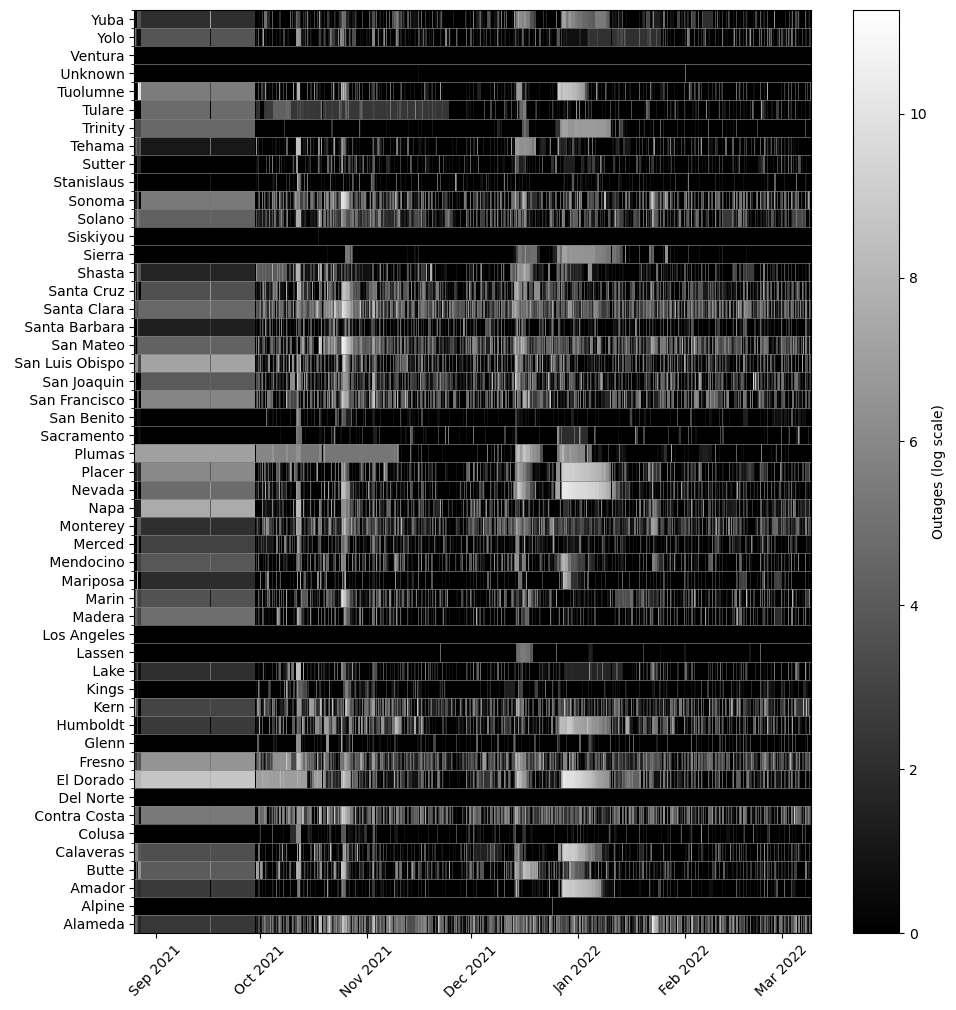

In [15]:



# Prepare the data for the image plot
data = df.iloc[:, 3:-1].values  # Extract the numerical data from columns 2 to 10

# Get the x-axis values using the converted datetime values
x = df['Timestamp'].values

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, len(column_names) * 0.2))


# Create a meshgrid of x and y values
X, Y = np.meshgrid(x, np.arange(data.shape[1]))

# Plot the data as a colored mesh
#linear
#mesh = ax.pcolormesh(X, Y, data.T, cmap='plasma')

#log
mesh = ax.pcolormesh(X, Y, np.log(data.T + 1) , cmap='gist_yarg_r')

# Add a colorbar with label
plt.colorbar(mesh, ax=ax, label='Outages (log scale)')
#plt.colorbar(mesh, ax=ax, label='Outages (linear scale)')


# Add horizontal grid lines
yticks = np.arange(len(df.columns[3:-1])) + 0.5
ax.set_yticks(yticks, minor=False)
ax.set_yticks(yticks, minor=True)
ax.grid(axis='y', linestyle='-', linewidth=0.5, color='gray', which='minor')



# Set the x-axis label and format the tick labels as months
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.xticks(rotation=45)  # Rotate x-axis tick labels for better readability

# Add y-axis tick labels with column header names
plt.yticks(np.arange(len(df.columns[3:-1])), df.columns[3:-1])
plt.yticks(rotation=0)  # Rotate y-axis tick labels to horizontal orientation

plt.tight_layout()  # Adjust the spacing between subplots
plt.savefig('county-img-log-RIBS.png', bbox_inches='tight', dpi=600);